In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as sla
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

## Question 1

In [2]:
from pyXSteam.XSteam import XSteam as xs
props = xs(xs.UNIT_SYSTEM_FLS)

In [3]:
tsat = props.tsat_p(2500)

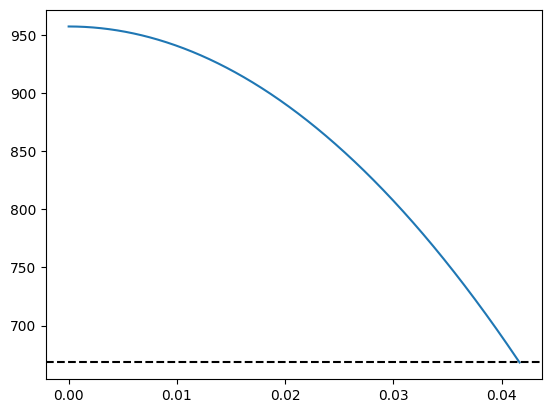

In [52]:
qpp = 1e7
ro = .5/12
kf= 10
c2 = tsat + (qpp*ro**2)/6/kf

q1_temp = lambda r : -qpp*r**2 / 6 / kf + c2
x = np.linspace(0,ro,1000)
plt.plot(x,q1_temp(x))
plt.axhline(tsat,color = 'k',linestyle = '--')
plt.show()

## Question 2

In [5]:
mu = .245 / (.032804)
tinf = 300
k = 28
h = 1000
r = .5
I = 1e14 *3600 / 0.00107639
qo = 5*(I*mu)*1.602176166058e-13*0.000947817#*1.51857e-16
qpp = lambda x : np.exp(-mu * x)
mu

7.468601390074381

In [6]:
mat = np.array([[k,-h],[h*r+k,h]])
vec = np.array([-qo /mu - h*tinf - h*qo / mu/mu /k   ,     qo*qpp(r) / mu *(h/mu/k -1) +h*tinf])
c1,c2 = sla.solve(mat,vec)

In [7]:
temp = lambda x: -(-qo*qpp(x)/mu/mu/k + c1 * x + c2)

x: 0.16734375000000043 
 y: 912.5058191430851


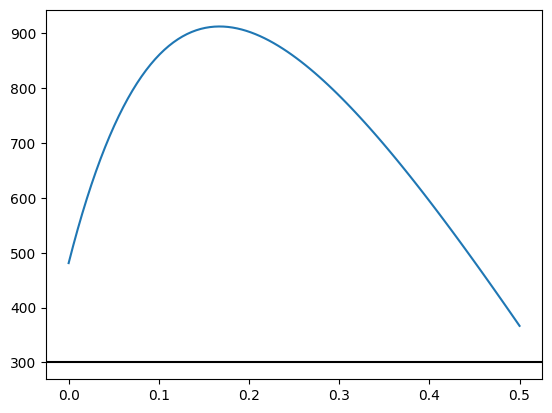

In [8]:
x = np.linspace(0,.5,100)
plt.plot(x,-temp(x))
plt.axhline(300,color = 'k')
xloc = sp.optimize.fmin(temp,x0=.05,full_output=False,disp=False)[0]
print(f'x: {xloc} \n y: {-temp(xloc)}')

In [9]:
x = -np.log(-c1*mu*k/qo)/mu

In [10]:
temp(x)
c1,c2

(np.float64(-2599.5324674852113), np.float64(1695.496884591924))

## Question 3

In [11]:
rco = 12.52e-3/2
rci = rco - 0.86e-3
rg = 230e-6
rfo = rci-rg
pf = .88 /.95 
kc = 17
hg = 4300
kf = 2.417 #2.7 * pf #this is wrong
af =  rfo**2 * np.pi
p_ratio = rfo/rci
qpp = 44e3 / af #this is right it has to be... right?

In [13]:
c3 = p_ratio * qpp *rfo*rci / (-2 * kc)
c4 = 295 - c3*np.log(rco)
c_temp = lambda r : c3*np.log(r) + c4
# -kc*c3 / rci / hg +
c2 =  qpp*rfo / 2 / hg + c_temp(rci) + qpp*rfo**2 / 4 / kf # should be 2112
f_temp = lambda r : -qpp*r**2 / 4 / kf + c2


Centerline Temp:  2119.536926514911 
Fuel Outer:  670.8779492614158
Inner Clad:  355.8755878722118 
Clad Outer:  295.0


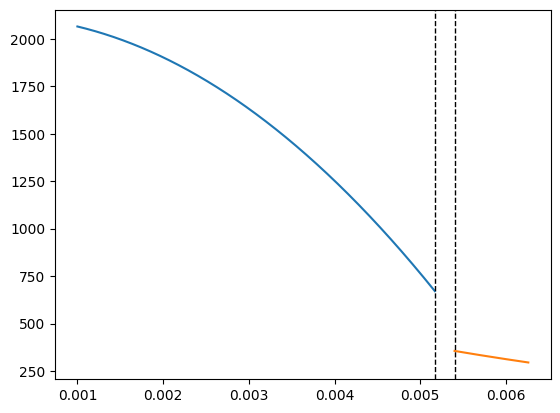

In [14]:
rf = np.linspace(1e-3,rfo,1000)
rc = np.linspace(rci,rco,1000)
plt.plot(rf,f_temp(rf))
plt.plot(rc,c_temp(rc))
plt.axvline(rfo,color = 'k',linestyle = '--',linewidth = 1)
plt.axvline(rci,color = 'k',linestyle = '--',linewidth = 1)

print(f'Centerline Temp:  {f_temp(0)} \nFuel Outer:  {f_temp(rfo)}')
print(f'Inner Clad:  {c_temp(rci)} \nClad Outer:  {c_temp(rco)}')

## Question 4

Time to 300 degrees F: 1.5541157518774595 hours or 5594.816706758855 seconds
Time Constant: 0.8302777777777774


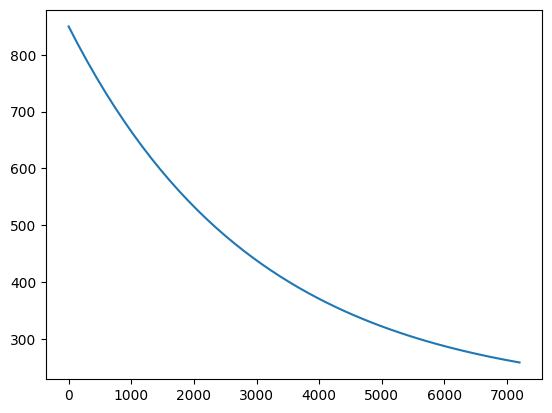

In [40]:
sav = lambda r: 4*np.pi * r**2 / (4/3 * np.pi *r**3)
c1,c2 = 650,200
h = 2 
cp = .122
rho = 490
q4_temp = lambda t : c1 * np.exp( (-h*sav(1/12)) / (rho *cp) * t/3600) + c2
tau = rho * cp / sav(1/12) / h
x = np.linspace(0,7200)
plt.plot(x,q4_temp(x))
t300 = -np.log((300 - c2)/c1) * rho * cp / sav(1/12) / h
print(f'Time to 300 degrees F: {t300} hours or {t300*3600} seconds\nTime Constant: {tau}')

Time Constant: 0.002916666666666667
Time to 499 degrees F: 0.017475104929064948 hours or 62.91037774463381 seconds


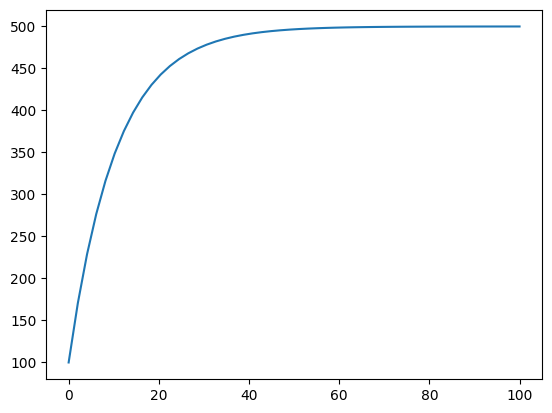

In [42]:
c1,c2 = -400,500
sav = lambda r : 2 / r
h,rho,cp = 200,700,.04
tau = rho * cp / sav(1/24) / h
q5_temp = lambda t : c1*np.exp(- t/3600/tau) + c2
x = np.linspace(0,100)
plt.plot(x,q5_temp(x))
t499 = -tau*np.log((499-c2)/c1)
print(f'Time Constant: {tau}\nTime to 499 degrees F: {t499} hours or {t499*3600} seconds')

In [39]:
h/k

0.001984126984126984